In [1]:
import pandas as pd
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

import nltk
from nltk import FreqDist
import ssl
#nltk.download("stopwords")

#libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from utls.words import freq_words
from utls.words import remove_stop_words

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#download stopping words
#once is okay no need to run twice
"""
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")
"""

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tsunami/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#download lemmatization from spaCy
#!python -m spacy download en

In [2]:
df_raw = pd.read_csv('/Users/tsunami/glass_view//rawdat/wells_fargo_reviews.csv') # 16 columns, 1007 rows
df_raw.head()

,date,employee_title,location,employee_status,review_title,years_at_company,helpful,pros,cons,advice_to_mgmt,rating_overall,rating_balance,rating_culture,rating_career,rating_comp,rating_mgmt
0,Mon Mar 16 2020 12:39:33 GMT-0400 (Eastern Day...,Business Analyst,"Charlotte, NC",Current Employee,good,I have been working at Wells Fargo full-time f...,2,good place to grow your skill set,micro management can be eased up on,NaN,5.0,4.0,4.0,4.0,4.0,4.0
1,Fri Aug 24 2018 20:34:04 GMT-0400 (Eastern Day...,Branch Manager,"Austin, TX",Current Employee,Coming to work here was the best decision ever.,I have been working at Wells Fargo full-time f...,240,The culture here is phenomenal. The message is...,"Some systems are a bit antiquated, but to be h...",NaN,5.0,5.0,5.0,5.0,4.0,5.0
2,Fri Jun 05 2020 17:37:57 GMT-0400 (Eastern Day...,Phone Banker,"Boise, ID",Former Employee,Great Company,I worked at Wells Fargo full-time for more tha...,0,Great benefits and community get to help out p...,Some rushing on phones can deter customer rela...,NaN,5.0,5.0,5.0,5.0,5.0,5.0
3,Fri Jun 05 2020 18:33:17 GMT-0400 (Eastern Day...,Licensed Personal Banker,"New York, NY",Current Employee,great company,I have been working at Wells Fargo full-time f...,0,"great work life balance, Wells Fargo makes sur...",not a big footprint in New York City,NaN,5.0,5.0,5.0,4.0,5.0,5.0
4,Fri Jun 05 2020 19:37:54 GMT-0400 (Eastern Day...,Analytics Consultant,"San Francisco, CA",Former Employee,solid place to work,I worked at Wells Fargo full-time,0,good place to learn analytics,there will be bureaucracies to overcome.,NaN,4.0,4.0,3.0,5.0,4.0,4.0


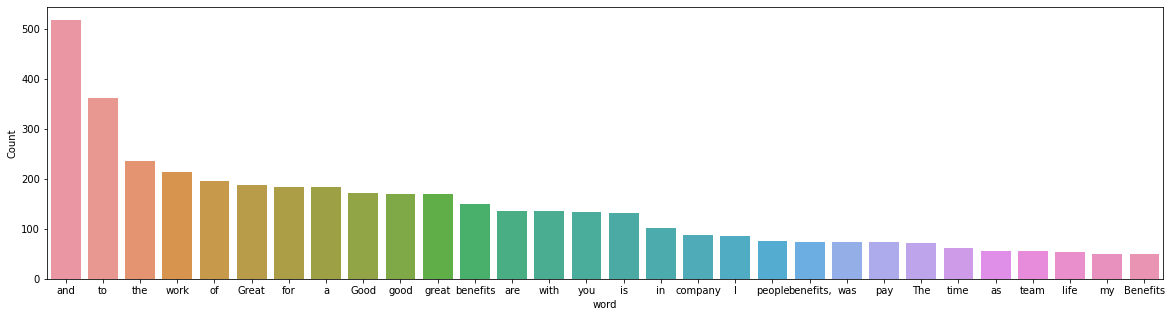

In [4]:
#freq_words(df_raw['pros'])
#freq_words(df_raw['cons'])

In [5]:
rev_pro = remove_stop_words(df_raw, 'pros')
rev_con = remove_stop_words(df_raw, 'cons')

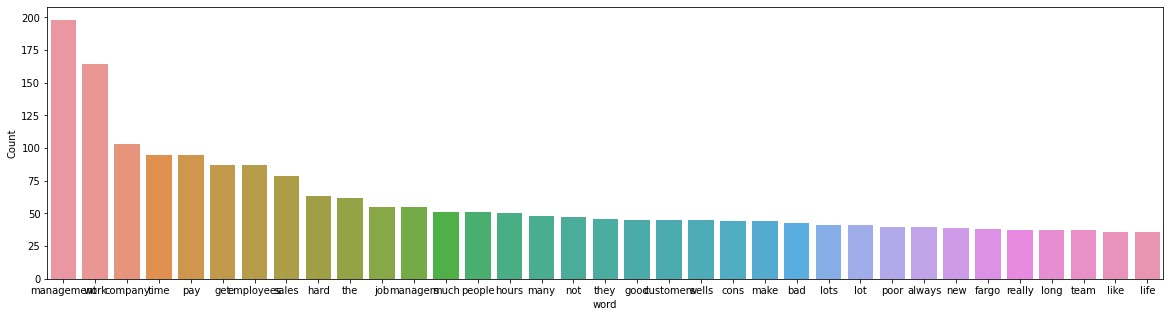

In [6]:
freq_words(rev_con, 35)